## **Connecting to the drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **Importing the required Libraries**

In [2]:
#importing required libraries for loading dataset and processing
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings ('ignore')
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

## **Loading the dataset**

In [5]:
#loading dataset
df = pd.read_csv("/content/gdrive/MyDrive/Deep learning project/fer2013.csv")
#first five records 
df.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
#first 5 rows of data
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
#shape and of the dataset
df.shape

(35887, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [9]:
# Total number of Emotion 
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

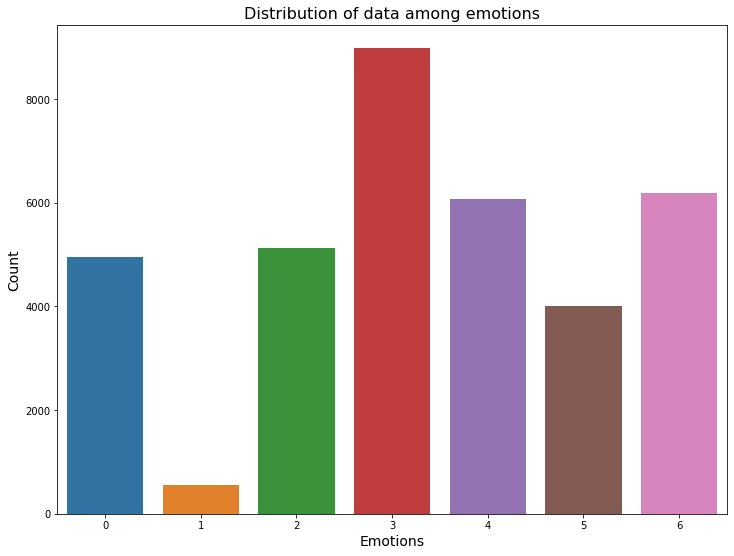

In [10]:
plt.figure(figsize=(12, 9))
sns.countplot(df['emotion'])
plt.title("Distribution of data among emotions", size=16)
plt.xlabel("Emotions", size=14)
plt.ylabel("Count", size=14)
plt.show()

In [11]:
#Assigning Names to Emotions in labels
emotion_dict = {0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad',5: 'suprise', 6: 'neutral'}
width = 48
height = 48
classes=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))
df.Usage.value_counts() 

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

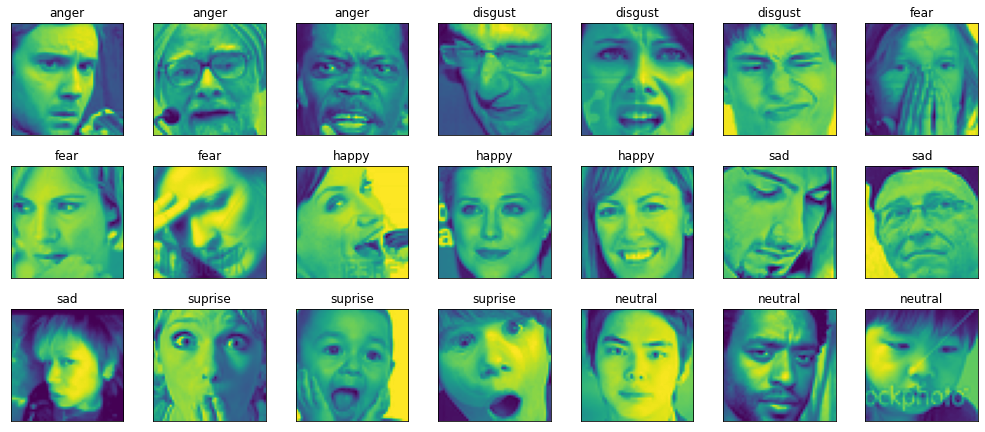

In [13]:
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_dict[label])
        plt.tight_layout()

In [14]:
k = np.array(list(map(int,df.iloc[0,1].split(" "))),dtype='uint8').reshape((48,48))
k.shape

(48, 48)

In [15]:
X_train = []
y_train = []
X_test = []
y_test = []
for index, row in df.iterrows():
    k = row['pixels'].split(" ")
    if row['Usage'] == 'Training':
        X_train.append(np.array(k))
        y_train.append(row['emotion'])
    elif row['Usage'] == 'PublicTest':
        X_test.append(np.array(k))
        y_test.append(row['emotion'])

In [16]:
X_train[0]

array(['70', '80', '82', ..., '106', '109', '82'], dtype='<U3')

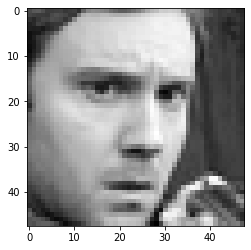

In [17]:
plt.imshow(np.array(X_train[0], dtype = 'uint8').reshape(48,48), cmap = 'gray')

### **Train and Test data sets**

In [18]:
X_train = np.array(X_train, dtype = 'uint8')
y_train = np.array(y_train, dtype = 'uint8')
X_test = np.array(X_test, dtype = 'uint8')
y_test = np.array(y_test, dtype = 'uint8')

In [19]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [20]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((28709, 48, 48, 1), (28709,), (3589, 48, 48, 1), (3589,))

In [21]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

## **Image Augmentation**

In [22]:
from keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

testgen = ImageDataGenerator( 
    rescale=1./255
    )
datagen.fit(X_train)
batch_size = 64

In [23]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)

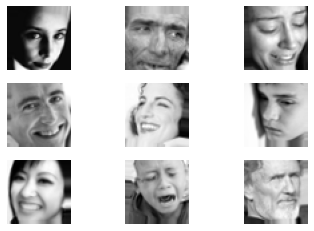

In [24]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9): 
        plt.axis('off') 
        plt.subplot(330 + 1 + i) 
        plt.imshow(X_batch[i].reshape(48, 48), cmap=plt.get_cmap('gray'))
    plt.axis('off') 
    plt.show() 
    break

# **Creating model for training**

### **Required libraries for Model Implementation**

In [25]:
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential

In [26]:
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.optimizers import Adam , RMSprop ,SGD                     #for training deep learning models
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

## **Model Implemented**

In [27]:
def FER_Model(input_shape=(48,48,1)):
    # first input model
    visible = Input(shape=input_shape, name='input')

    #the 1-st block
    conv1_1 = Conv2D(32, kernel_size=3, strides=(1,1),activation='relu', name = 'conv1_1')(visible)
    pool1_1 = MaxPooling2D(pool_size=(2,2), name = 'pool1_1')(conv1_1)
    conv1_1 = BatchNormalization()(pool1_1)

    #the 2-nd block
    conv2_1 = Conv2D(64, kernel_size=3, strides=(1,1),activation='relu',name = 'conv2_1')(conv1_1)
    pool2_1 = MaxPooling2D(pool_size=(2,2), name = 'pool2_1')(conv2_1)
    conv2_1 = BatchNormalization()(pool2_1)

    #the 3-rd block
    conv3_1 = Conv2D(128, kernel_size=3,strides=(1,1), activation='relu', name = 'conv3_1')(pool2_1)
    pool3_1 = MaxPooling2D(pool_size=(2,2), name = 'pool3_1')(conv3_1)
    conv3_1 = BatchNormalization()(pool3_1)

    #Flatten and output
    flatten = Flatten(name = 'flatten')(conv3_1)
    drop1 = Dense(480, activation='relu', name = 'drop1')(flatten)
    drop2 = Dense(240, activation='relu', name = 'drop2')(drop1)
    ouput = Dense(7, activation='softmax', name = 'output')(drop2)

    # create model 
    model = Model(inputs =visible, outputs = ouput)
    
    # summary layers
    print(model.summary())
    
    return model

In [28]:
model = FER_Model()
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 48, 48, 1)]       0         
                                                                 
 conv1_1 (Conv2D)            (None, 46, 46, 32)        320       
                                                                 
 pool1_1 (MaxPooling2D)      (None, 23, 23, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 32)       128       
 ormalization)                                                   
                                                                 
 conv2_1 (Conv2D)            (None, 21, 21, 64)        18496     
                                                                 
 pool2_1 (MaxPooling2D)      (None, 10, 10, 64)        0         
                                                             

In [29]:
from keras.callbacks import ModelCheckpoint
filepath="weights_min_loss.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor= 'val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [30]:
num_epochs = 100
history = model.fit(train_flow, 
                    steps_per_epoch=len(X_train) / batch_size, 
                    epochs=num_epochs,
                    verbose=1,  
                    callbacks=callbacks_list,
                    validation_data=test_flow,  
                    validation_steps=len(X_test) / batch_size)

Epoch 1/100
449/448 [==============================] - ETA: 0s - loss: 1.5906 - accuracy: 0.3784
Epoch 1: val_loss improved from inf to 1.95970, saving model to weights_min_loss.hdf5
448/448 [==============================] - 25s 31ms/step - loss: 1.5906 - accuracy: 0.3784 - val_loss: 1.9597 - val_accuracy: 0.2505
Epoch 2/100
449/448 [==============================] - ETA: 0s - loss: 1.3633 - accuracy: 0.4736
Epoch 2: val_loss improved from 1.95970 to 1.35490, saving model to weights_min_loss.hdf5
448/448 [==============================] - 13s 29ms/step - loss: 1.3633 - accuracy: 0.4736 - val_loss: 1.3549 - val_accuracy: 0.4778
Epoch 3/100
448/448 [============================>.] - ETA: 0s - loss: 1.2800 - accuracy: 0.5068
Epoch 3: val_loss improved from 1.35490 to 1.28778, saving model to weights_min_loss.hdf5
448/448 [==============================] - 13s 29ms/step - loss: 1.2797 - accuracy: 0.5068 - val_loss: 1.2878 - val_accuracy: 0.5241
Epoch 4/100
448/448 [=======================

# **Testing Model**

<Figure size 432x288 with 0 Axes>

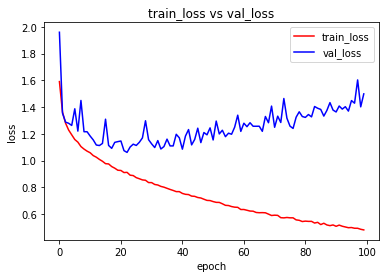

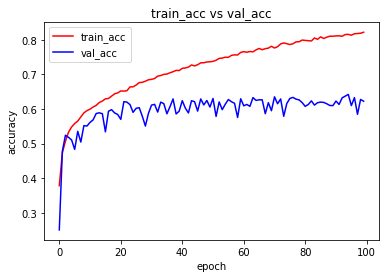

<Figure size 432x288 with 0 Axes>

In [31]:
%matplotlib inline

train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.figure()

In [32]:
model.save('../working/Fer2013.h5')

In [33]:
loss = model.evaluate(X_test/255., y_test) 
print("Test Loss " + str(loss[0]))
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 1s 4ms/step - loss: 1.4988 - accuracy: 0.6222
Test Loss 1.498837947845459
Test Acc: 0.622178852558136


113/113 [==============================] - 0s 2ms/step


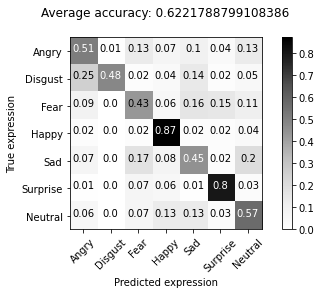

In [34]:
import itertools 
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()
y_pred_ = model.predict(X_test/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(y_test, axis=1)
fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=classes,
                      normalize=True,
                      cmap=plt.cm.Greys,   title='Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

In [35]:
from keras.models import Model, model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
